# Janine Par:MLB Attenance Analysis and Recommendation
 

### Load Libraries Needed

In [2]:
import numpy as np  
import pandas as pd  
import numbers
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import scipy.stats as ss
warnings.filterwarnings('ignore')

### Load the dodgers dataset to a Pandas data frame.

In [3]:
df_dodgers=pd.read_csv('gym_members_exercise.csv',  encoding='latin-1')  

In [258]:
df_dodgers.head(5)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


Get Statistic information

In [259]:
 df_dodgers["attend"].describe()

count       81.000000
mean     41040.074074
std       8297.539460
min      24312.000000
25%      34493.000000
50%      40284.000000
75%      46588.000000
max      56000.000000
Name: attend, dtype: float64

Based on the basic statistical information above:

This shows that the dataset provided is data for an entire season of MLB. There will be 162 regular season games and 81 of those are played at Dodger Stadium. 

Let's look at the records that have the maximum (56000.000000)  and minimum attendance (24312.000000)

In [260]:
df_dodgers[df_dodgers['attend']== df_dodgers["attend"].max()]

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
59,AUG,21,56000,Tuesday,Giants,75,Clear,Night,NO,NO,NO,YES


These records show that the following factors could impact high attendance in Dodge stadium
* Season Opener
* Bobblehead giveaways
* Good Weather
* Game opponent is the Pirates and Giants
* Could it be that it's a Tuesday too?

We can explore these factors in the entirety of the dataset and confirm if they played a huge role in driving up MLB’s total attendance.

In [261]:
df_dodgers[df_dodgers['attend']== df_dodgers["attend"].min()]

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
18,MAY,14,24312,Monday,Snakes,67,Clear,Night,NO,NO,NO,NO


Looking at a minimum attendance, we can see the following factors
* It's a Monday 
* No Giveways or Fireworks
* Opponent is Pirates

Plotting the attandance historgram, I an a multimodal distribution with multiple modes with distinct peaks are 35000, 40000 and 55000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


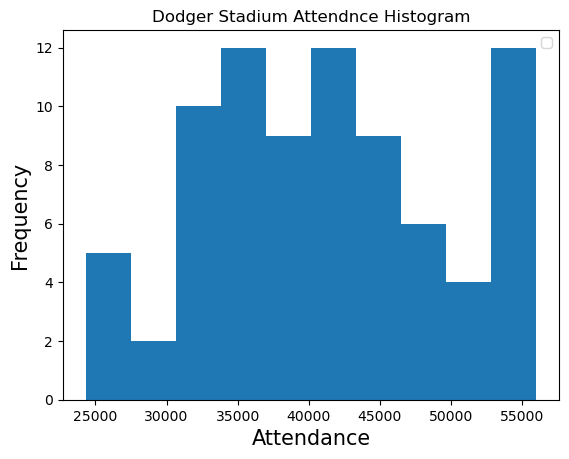

In [262]:
# Create Histogram
plt.hist([df_dodgers['attend']], bins=10)
plt.legend(loc='upper right')
plt.title("Dodger Stadium Attendnce Histogram")
plt.xlabel("Attendance", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.show()

# Let's look at the oppenent

In [263]:
df_subset=df_dodgers.groupby(['opponent']).attend.describe().sort_values("mean", ascending = False,).reset_index()

In [264]:
df_subset.sort_values("mean", ascending = False,)

,opponent,count,mean,std,min,25%,50%,75%,max
0,Angels,3.0,49777.333333,5931.256893,43494.0,47026.50,50559.0,52919.00,55279.0
1,Mets,4.0,49586.250000,4565.136681,44217.0,47808.75,49384.5,51162.00,55359.0
2,Nationals,3.0,49267.333333,4738.481860,44807.0,46780.00,48753.0,51497.50,54242.0
3,White Sox,3.0,46382.000000,6614.339272,40432.0,42821.00,45210.0,49357.00,53504.0
4,Cubs,3.0,44206.666667,2127.087759,42495.0,43016.00,43537.0,45062.50,46588.0
5,Padres,9.0,42092.222222,7431.611951,31601.0,38359.00,40619.0,46549.00,54014.0
6,Phillies,3.0,41897.000000,10762.222029,32238.0,36096.50,39955.0,46726.50,53498.0
7,Cardinals,7.0,40853.285714,2803.223187,35754.0,39775.00,40906.0,42879.00,44005.0
8,Marlins,3.0,40665.333333,1101.663439,39805.0,40044.50,40284.0,41095.50,41907.0
9,Reds,3.0,40649.000000,11194.056503,33884.0,34188.50,34493.0,44031.50,53570.0


<AxesSubplot:title={'center':'attend'}, xlabel='opponent'>

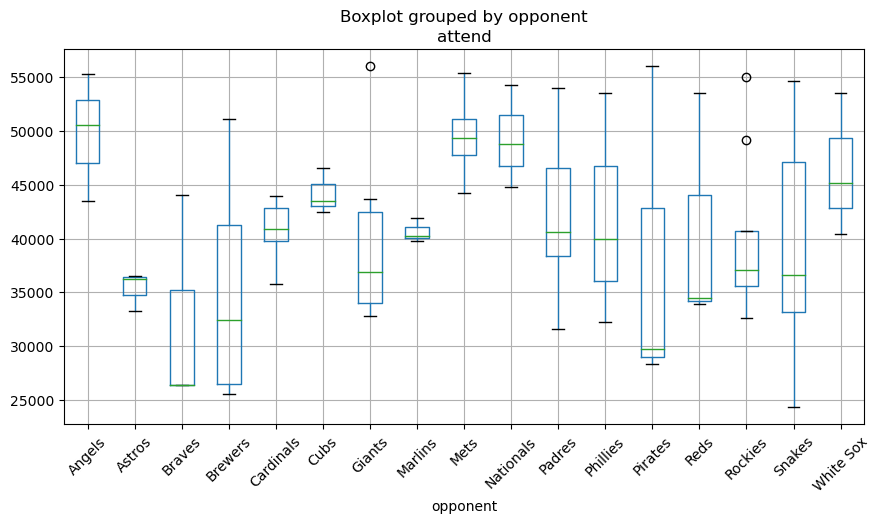

In [265]:
df_dodgers.boxplot(column=['attend'], by='opponent', fontsize = 10, rot=45, figsize=(10,5))


This shows that high attendance for these top three oponents:
* Angels 
* Mets 
* Nationals

The initial top attendance game with Giants seem to be an outlier and the highest attendance on that day is because it's the season opener and not because of the opponent. 

# Let's look at the Day of the Week

In [266]:
df_dodgers["day_of_week"].value_counts()

Tuesday      13
Friday       13
Saturday     13
Sunday       13
Wednesday    12
Monday       12
Thursday      5
Name: day_of_week, dtype: int64

In [267]:
df_subset=df_dodgers.groupby(['day_of_week']).attend.describe().sort_values("mean", ascending = False,).reset_index()

In [268]:
df_subset.sort_values("mean", ascending = False,)

,day_of_week,count,mean,std,min,25%,50%,75%,max
0,Tuesday,13.0,47741.230769,8291.390044,32799.0,42473.00,51137.0,55024.00,56000.0
1,Saturday,13.0,43072.923077,6336.482298,33735.0,39383.00,42449.0,46549.00,54242.0
2,Sunday,13.0,42268.846154,7596.350657,31607.0,35754.00,41907.0,48753.00,55359.0
3,Thursday,5.0,40407.400000,12411.591328,26773.0,28328.00,43309.0,49006.00,54621.0
4,Friday,13.0,40116.923077,4694.879400,31601.0,37133.00,40167.0,43537.00,49763.0
5,Wednesday,12.0,37585.166667,8696.234889,25509.0,32927.00,36840.0,41003.25,53570.0
6,Monday,12.0,34965.666667,7005.957949,24312.0,32553.75,33582.0,37162.50,50559.0


<AxesSubplot:title={'center':'attend'}, xlabel='day_of_week'>

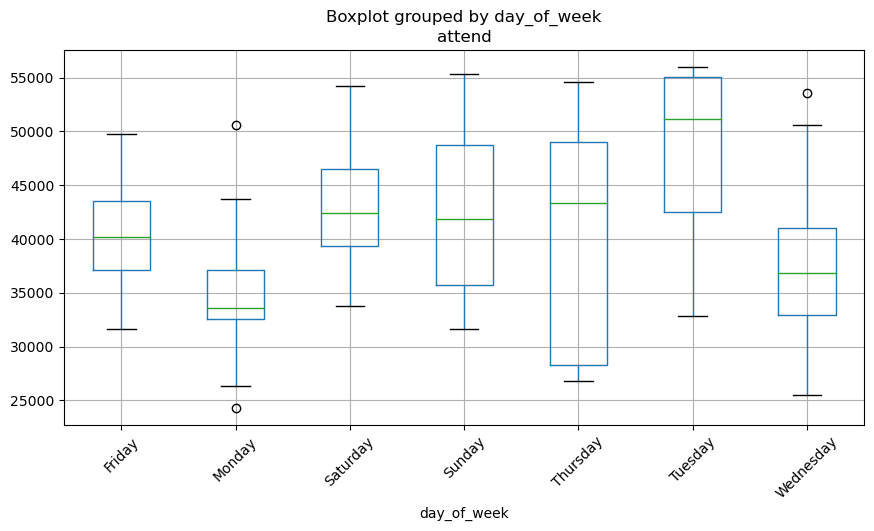

In [269]:
df_dodgers.boxplot(column=['attend'], by='day_of_week', fontsize = 10, rot=45, figsize=(10,5))


The boxplot shows that Tuesday seems to have a higher average attendance while monday shows the lowest. This is suprising for me because I thought that the weekends would have higher attendance. With that, I would like to look more on the Tuesday games and see what variables could impact higher attendance this day of the week. 


In [270]:
df_subset_tues=df_dodgers[df_dodgers['day_of_week']=='Tuesday']

In [271]:
df_subset_tues.sort_values("attend", ascending = False,)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
59,AUG,21,56000,Tuesday,Giants,75,Clear,Night,NO,NO,NO,YES
31,JUN,12,55279,Tuesday,Angels,66,Cloudy,Night,NO,NO,NO,YES
56,AUG,7,55024,Tuesday,Rockies,80,Clear,Night,NO,NO,NO,YES
47,JUL,17,53498,Tuesday,Phillies,70,Clear,Night,NO,NO,NO,NO
50,JUL,31,52832,Tuesday,Snakes,75,Cloudy,Night,NO,NO,NO,YES
27,MAY,29,51137,Tuesday,Brewers,74,Clear,Night,NO,NO,NO,YES
19,MAY,15,47077,Tuesday,Snakes,70,Clear,Night,NO,NO,NO,YES
7,APR,24,44014,Tuesday,Braves,63,Cloudy,Night,NO,NO,NO,NO
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,NO,NO,NO,NO


In [272]:
df_subset_tues.groupby(['skies']).attend.describe().sort_values("mean", ascending = False,)

,count,mean,std,min,25%,50%,75%,max
skies,,,,,,,,
Clear,9.0,48291.888889,8166.913255,32799.0,42473.0,51137.0,55024.00,56000.0
Cloudy,4.0,46502.250000,9704.100452,33884.0,41481.5,48423.0,53443.75,55279.0


In [273]:
df_subset_tues.groupby(['day_night']).attend.describe().sort_values("mean", ascending = False,)

,count,mean,std,min,25%,50%,75%,max
day_night,,,,,,,,
Day,1.0,56000.0,NaN,56000.0,56000.0,56000.0,56000.0,56000.0
Night,12.0,47053.0,8263.141478,32799.0,42009.5,49107.0,53879.5,56000.0


In [274]:
df_subset_tues.groupby(['cap', 'shirt', 'fireworks', 'bobblehead']).attend.describe().sort_values("mean", ascending = False,)

count     mean          std      min  \
cap shirt fireworks bobblehead                                         
NO  NO    NO        YES           6.0  52891.5  3370.480841  47077.0   
                    NO            5.0  45756.8  9308.257071  32799.0   
    YES   NO        NO            1.0  40619.0          NaN  40619.0   
YES NO    NO        NO            1.0  33884.0          NaN  33884.0   

                                     25%      50%       75%      max  
cap shirt fireworks bobblehead                                        
NO  NO    NO        YES         51560.75  53928.0  55215.25  56000.0  
                    NO          42473.00  44014.0  53498.00  56000.0  
    YES   NO        NO          40619.00  40619.0  40619.00  40619.0  
YES NO    NO        NO          33884.00  33884.0  33884.00  33884.0

I have looked at Tuesday data and the variables that could correlate with higher attendance. The clear skies, night game and bobblehead giveaways have contributed to higher attendance on Tuesday. 

Let's see the next steps in more detail as we look at these variables. 

# Let's look at the giveaways/fireworks

In [275]:
df_dodgers.groupby(['cap', 'shirt', 'fireworks', 'bobblehead']).attend.describe().sort_values("mean", ascending = False,)

count          mean          std      min  \
cap shirt fireworks bobblehead                                              
NO  NO    NO        YES          11.0  53144.636364  2887.153279  47077.0   
    YES   NO        NO            3.0  46643.666667  5295.079351  40619.0   
    NO    YES       NO           14.0  41077.857143  5768.351782  31601.0   
          NO        NO           51.0  38201.078431  7437.222312  24312.0   
YES NO    NO        NO            2.0  38189.500000  6088.896493  33884.0   

                                     25%      50%       75%      max  
cap shirt fireworks bobblehead                                        
NO  NO    NO        YES         51984.50  54242.0  55151.50  56000.0  
    YES   NO        NO          44686.00  48753.0  49656.00  50559.0  
    NO    YES       NO          37255.25  40299.5  43789.00  53570.0  
          NO        NO          33423.00  37084.0  43401.50  56000.0  
YES NO    NO        NO          36036.75  38189.5  40342.25  42495.0

In [276]:
df_subset=df_dodgers.groupby(['cap', 'shirt', 'fireworks', 'bobblehead']).attend.describe().sort_values("mean", ascending = False,).reset_index()
df_subset

,cap,shirt,fireworks,bobblehead,count,mean,std,min,25%,50%,75%,max
0,NO,NO,NO,YES,11.0,53144.636364,2887.153279,47077.0,51984.50,54242.0,55151.50,56000.0
1,NO,YES,NO,NO,3.0,46643.666667,5295.079351,40619.0,44686.00,48753.0,49656.00,50559.0
2,NO,NO,YES,NO,14.0,41077.857143,5768.351782,31601.0,37255.25,40299.5,43789.00,53570.0
3,NO,NO,NO,NO,51.0,38201.078431,7437.222312,24312.0,33423.00,37084.0,43401.50,56000.0
4,YES,NO,NO,NO,2.0,38189.500000,6088.896493,33884.0,36036.75,38189.5,40342.25,42495.0


By looking at the statistics above with the combination of different giveaways/firework, the **booblehead** seem to have result to a good attenance with mean of 53144 followed by **shirts**. Let's look at the correlation between attendance and these giveaway/fireworks variables

In [277]:
#Get Dummies 
df_dodger_give=pd.concat([pd.get_dummies(df_dodgers[['cap', 'shirt','fireworks','bobblehead']],drop_first=True), df_dodgers[['attend']]], axis=1)
df_dodger_give.head()

,cap_YES,shirt_YES,fireworks_YES,bobblehead_YES,attend
0,0,0,0,0,56000
1,0,0,0,0,29729
2,0,0,0,0,28328
3,0,0,1,0,31601
4,0,0,0,0,46549


In [278]:
df_dodger_give.corr()

,cap_YES,shirt_YES,fireworks_YES,bobblehead_YES,attend
cap_YES,1.000000,-0.031204,-0.072732,-0.063074,-0.055002
shirt_YES,-0.031204,1.000000,-0.089648,-0.077743,0.133269
fireworks_YES,-0.072732,-0.089648,1.000000,-0.181207,0.002094
bobblehead_YES,-0.063074,-0.077743,-0.181207,1.000000,0.581895
attend,-0.055002,0.133269,0.002094,0.581895,1.000000


Attendence seems to be most correlated with **Bobblehead** giveaways with 0.581895 while **Cap** has negative correlation

# Let's look at the Temperature

<AxesSubplot:title={'center':'Temperature vs. Attendance'}, xlabel='temp', ylabel='attend'>

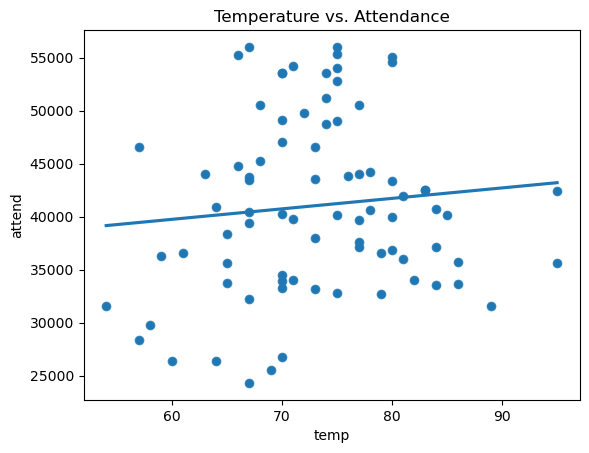

In [279]:
ax = sns.scatterplot(data=df_dodgers, x='temp', y='attend')
ax.set_title("Temperature vs. Attendance")
ax.set_xlabel("Temperature")
ax.set_ylabel("Attendance")
sns.regplot(df_dodgers['temp'],df_dodgers['attend'], ci=None)

The relationship between attendence and temp does not appear to be linear however the plot shows that the higher attendance appear to be with temperature 65 to 80.

# Let's look at the Month and Season

In [280]:
#Create function to determine the Start, Mid, End of MLB season
def season (Month):
    if Month in ('APR','MAY'):
        return "SEASON START"
    elif Month in ('JUN','JUL','AUG'):
        return "MID SEASON"
    else: 
        return "END SEASON"
    

In [281]:
df_dodgers['SEASON'] =df_dodgers['month'].apply(season)

In [282]:
df_subset=df_dodgers.groupby(['SEASON']).attend.describe().sort_values("mean", ascending = False,).reset_index()

In [283]:
df_subset.sort_values("mean", ascending = False,)

,SEASON,count,mean,std,min,25%,50%,75%,max
0,MID SEASON,36.0,44426.333333,7670.695808,32238.0,39191.75,43515.5,52998.50,56000.0
1,END SEASON,15.0,38504.800000,5016.028811,31607.0,34810.50,37133.0,41586.50,50560.0
2,SEASON START,30.0,38244.200000,9006.847056,24312.0,31900.50,37288.5,44608.75,56000.0


<AxesSubplot:title={'center':'attend'}, xlabel='SEASON'>

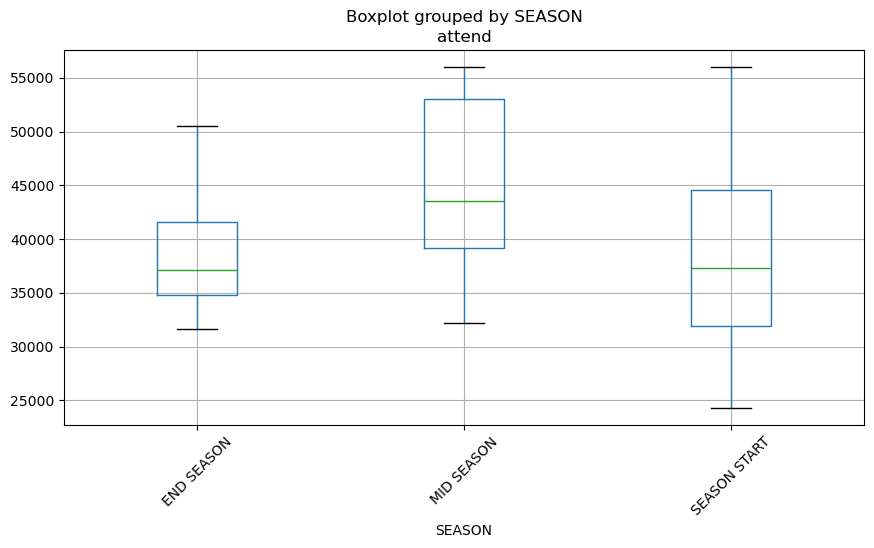

In [284]:
df_dodgers.boxplot(column=['attend'], by='SEASON', fontsize = 10, rot=45, figsize=(10,5))


Mid-season seem to have a highest average attendance while both Season Ender and Season Start have a close average. This is helpful for management to see what they can do to increase attendance specifically on last few months of the season

# Let's look at the Day of the Month and see if the week where the day is have a correlation with the attendance

In [285]:
df_dodgers.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,SEASON
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,SEASON START
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO,SEASON START
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,SEASON START
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO,SEASON START
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO,SEASON START


In [286]:
#Create function to determine the week for the day of the month
def day_week (day):
    if day >= 1 and day<=7:
        return "1st Week"
    elif day >7 and day<15:
        return "2nd Week"
    elif day >=15 and day<23:
        return "3rd Week"
    elif day >=23 and day<=31:
        return "4th Week"    
    else: 
        return "None"
    

In [287]:
df_dodgers['week'] =df_dodgers['day'].apply(day_week)


In [288]:
df_subset=df_dodgers.groupby(['week']).attend.describe().sort_values("mean", ascending = False,).reset_index()
df_subset.head()

,week,count,mean,std,min,25%,50%,75%,max
0,3rd Week,17.0,42678.588235,6567.275568,32238.0,39383.0,40432.0,45210.0,56000.0
1,1st Week,19.0,41070.894737,8013.337998,31607.0,33949.0,40619.0,45150.5,55359.0
2,2nd Week,19.0,40502.105263,9633.221821,24312.0,33267.0,40167.0,47836.5,56000.0
3,4th Week,26.0,40339.346154,8781.156042,25509.0,35776.0,40044.5,47766.5,54621.0


<AxesSubplot:title={'center':'attend'}, xlabel='week'>

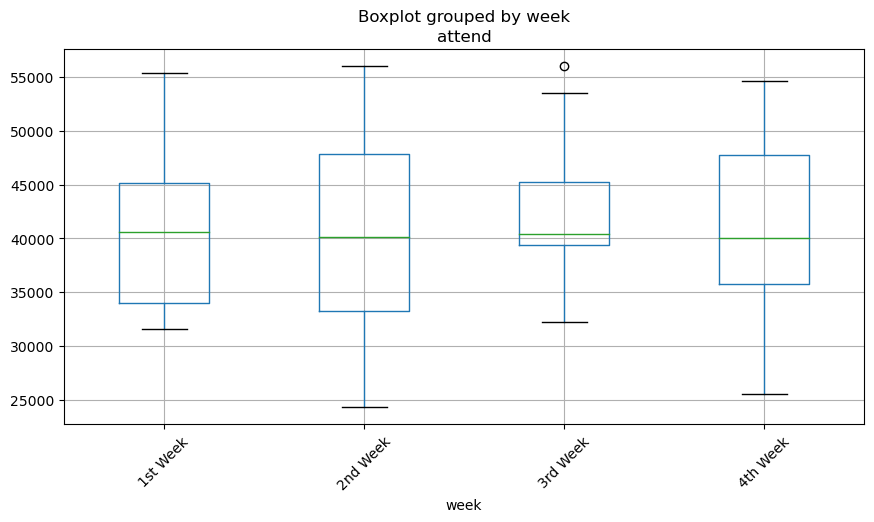

In [289]:
df_dodgers.boxplot(column=['attend'], by='week', fontsize = 10, rot=45, figsize=(10,5))

The plot above shows a very close average attendance between the week (where the days of the month is) which makes be think that there's no clear relation between days and attendance. 

# Let's look at the Skies

In [290]:
df_subset=df_dodgers.groupby(['skies']).attend.describe().sort_values("mean", ascending = False,).reset_index()
df_subset.head()

,skies,count,mean,std,min,25%,50%,75%,max
0,Clear,62.0,41729.209677,8054.788459,24312.0,35813.5,40525.5,48334.0,56000.0
1,Cloudy,19.0,38791.315789,8896.786536,26345.0,32570.5,36561.0,45281.5,55279.0


<AxesSubplot:title={'center':'attend'}, xlabel='skies'>

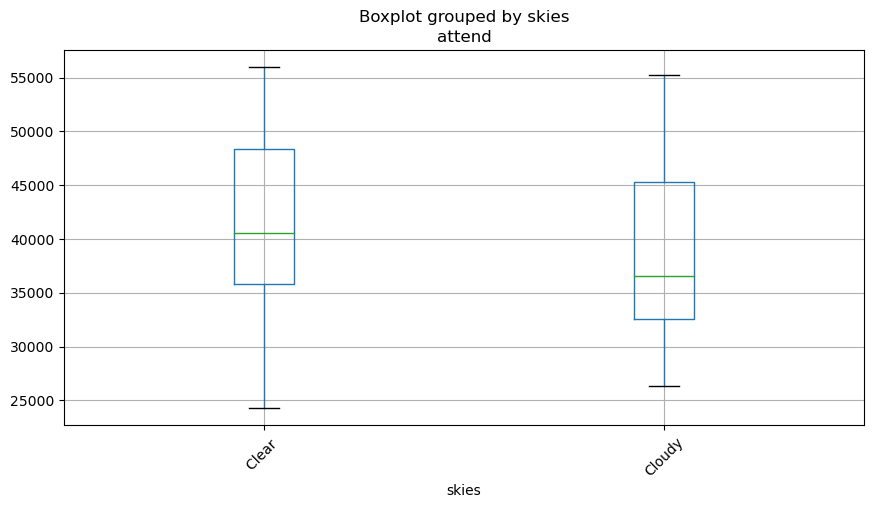

In [291]:
df_dodgers.boxplot(column=['attend'], by='skies', fontsize = 10, rot=45, figsize=(10,5))


Clear skies seem to have highest average attendance compare to cloudy skies. 


# Let's look at the Day or Night

In [292]:
df_subset=df_dodgers.groupby(['day_night','day_of_week']).attend.describe().sort_values("mean", ascending = False,).reset_index()
df_subset.sort_values("mean", ascending = False,)

,day_night,day_of_week,count,mean,std,min,25%,50%,75%,max
0,Day,Tuesday,1.0,56000.000000,NaN,56000.0,56000.00,56000.0,56000.00,56000.0
1,Night,Sunday,2.0,49682.000000,8028.490394,44005.0,46843.50,49682.0,52520.50,55359.0
2,Night,Tuesday,12.0,47053.000000,8263.141478,32799.0,42009.50,49107.0,53879.50,56000.0
3,Day,Saturday,1.0,44217.000000,NaN,44217.0,44217.00,44217.0,44217.00,44217.0
4,Night,Saturday,12.0,42977.583333,6608.493893,33735.0,38677.50,41586.5,46558.75,54242.0
5,Day,Sunday,11.0,40921.000000,7057.652443,31607.0,35680.50,39715.0,45624.00,53504.0
6,Night,Thursday,5.0,40407.400000,12411.591328,26773.0,28328.00,43309.0,49006.00,54621.0
7,Night,Friday,13.0,40116.923077,4694.879400,31601.0,37133.00,40167.0,43537.00,49763.0
8,Day,Wednesday,2.0,38275.500000,2375.171678,36596.0,37435.75,38275.5,39115.25,39955.0
9,Night,Wednesday,10.0,37447.100000,9574.760391,25509.0,30795.00,35549.0,42663.75,53570.0


<AxesSubplot:title={'center':'attend'}, xlabel='day_night'>

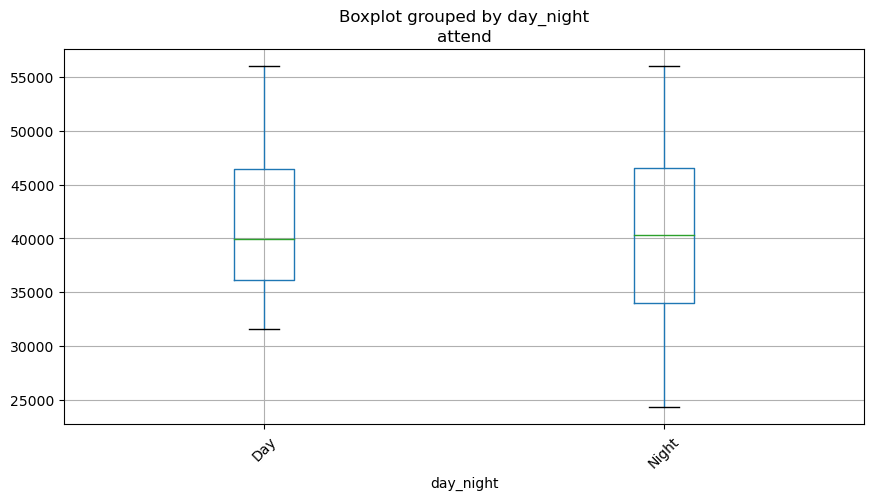

In [293]:
df_dodgers.boxplot(column=['attend'], by='day_night', fontsize = 10, rot=45, figsize=(10,5))

It appear that either weekday or weekend, Night game is more popular as it appear to have higher average attendance. 

# Summary and Conclusion. 


Based on the data and analysis above, we can conclude that these factors influence high attendance:

* The game is a season opener
* The game is more favorable at night
* As expected, games with clear skies and pleasant weather averaging 65 - 80 temp have higher attendance
* Top Dodger's opponents: Angels, Mets , Nationals have higher crowd attendance.
* Lastly, bobblehead giveaways are very popular, which draw higher attendance.

With the use of data, we can make a recommendation to management on how to improve attendance with the following:

* Games with opponents that have less attendance can increase attendance if the game includes popular giveaways/promotions such as bobbleheads. This is also true for last months of the season as they appear to have low attenance compare to start-mid season.
* Consider having night games more frequently.
* Look at the previous year/historical weather forecast to ensure an average of 65-80 temperature when scheduling games.
* The shirt and cap are the least favorable giveaway; consider replacing them with something new to invite a bigger crowd.

Need to look more: 

*  Tuesday games have higher attendance. I would explore more on this by looking at other external variables like average Ticket price, Traffic, and other events around the area that could impact this (i.e hotel promo's, restaurant/bar, events near the area ) to understand why this day of the week results to more people watching the game.